<a href="https://colab.research.google.com/github/Entro01/Bash-Scripting-Hyperskill/blob/main/model_compaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#modelling an algorithm to predict the species of the iris flower based on the given set of attributes.
#https://www.kaggle.com/datasets/uciml/iris

#Here we can see that given 4 features i.e sepal length, sepal width, petal length, and petal width determine whether a flower is Setosa, Versicolor or Virginica.

#    Sepal length,Sepal width, Petal length, Petal width are called feature/Variable/Input-variable/Independent-variable
#    Species are called Labels/Dependent-variable/out-variable/class/class-label/Response label

#selecting models
#since the iris dataset falls under the category of a supervised classification problem. the most common supervised classfication algorithms are the following:
#logistic regression
#svm
#naive bayes
#decision tree
#random forest

#my task is to implement each model individually, and then compare their accuraries in the end.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

iris = pd.read_csv("Iris.csv")

In [ ]:
print(iris.describe())
print(iris.shape)
print(iris.columns)
print(iris['Species'].value_counts())
print(iris.isnull().sum())
print(iris.head())
print(iris.tail())
iris.drop('Id', axis = 1, inplace = True)

In [ ]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalWidthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalLengthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalWidthCm").add_legend()

plt.show()

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species") \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species") \
    .map(plt.scatter,"PetalLengthCm","PetalWidthCm") \
    .add_legend()
plt.show()

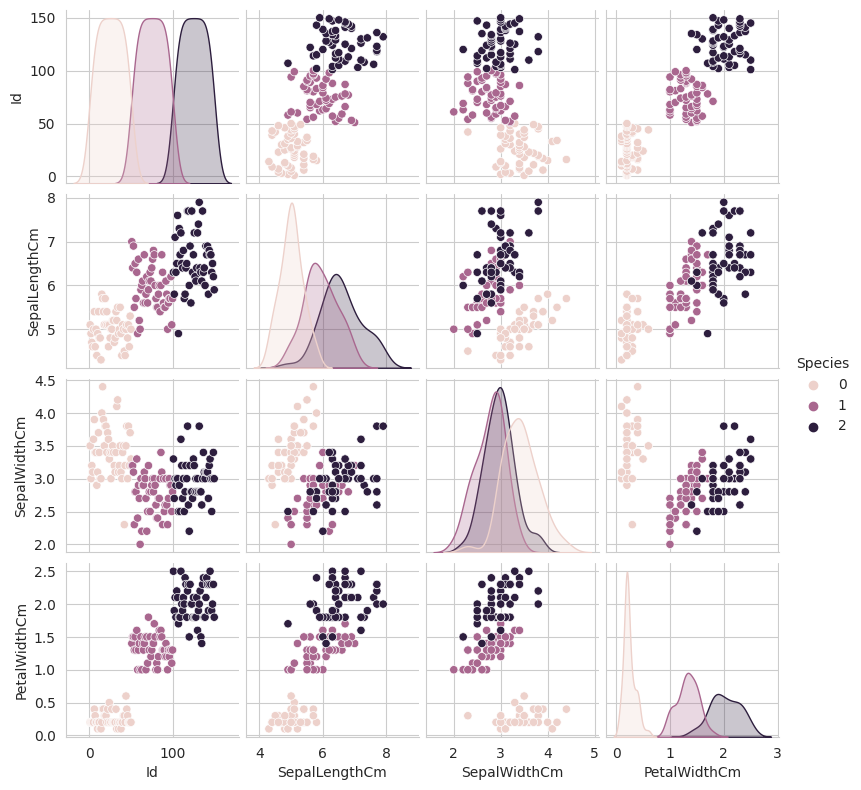

In [ ]:
sns.pairplot(iris, hue='Species', height=2)

In [ ]:
iris.corr()
#Here, the correlation coefficient between PetalLength and PetalWidth is 0.962757, which is much closer to 1, so we can remove any of the two variables.

,Id,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.356544,-0.419446
PetalWidthCm,0.899759,0.817954,-0.356544,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.956464,1.000000


In [ ]:
iris.drop('PetalLengthCm', axis = 1, inplace = True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head(100)

In [ ]:
sns.heatmap(iris.corr().drop(['Species'], axis = 1).drop(['Species'], axis = 0), linewidth=1, annot=True)
sns.heatmap(iris.corr(), linewidth=1, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns = ['Species'])
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

LR_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", LR_accuracy)

[[10  0  0]
 [ 0 13  0]
 [ 0  2 13]]
Accuracy:  94.73684210526315


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 0)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

SVM_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", SVM_accuracy)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 14]]
Accuracy:  97.36842105263158


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

DT_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", DT_accuracy)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 14]]
Accuracy:  97.36842105263158


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

NB_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", NB_accuracy)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 14]]
Accuracy:  97.36842105263158


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

RF_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", RF_accuracy)

[[10  0  0]
 [ 0 13  0]
 [ 0  2 13]]
Accuracy:  94.73684210526315


In [ ]:
print("ACCURACIES")
print("Logistic Regression: ", LR_accuracy)
print("SVM: ", SVM_accuracy)
print("Decision Tree: ", DT_accuracy)
print("Naive Bias: ", NB_accuracy)
print("Random Forrest: ", RF_accuracy)

ACCURACIES
Logistic Regression:  94.73684210526315
SVM:  97.36842105263158
Decision Tree:  97.36842105263158
Naive Bias:  97.36842105263158
Random Forrest:  94.73684210526315
